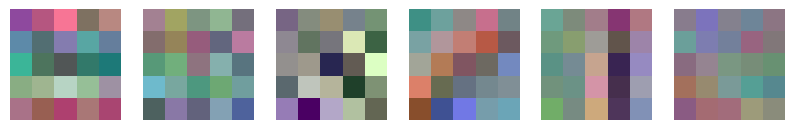

In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions
        #self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        #x = self.fc2(x)
        return x

# Load the trained model
net_color = SimpleLeNet5Color()
net_color.load_state_dict(torch.load('lenet2_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

net_color2 = net_color
# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Normalize the weights for better visualization
conv1_weights_normalized = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot the filters in the first layer
plt.figure(figsize=(10, 5))
for i in range(conv1_weights_normalized.size(0)):
    plt.subplot(1, 6, i + 1)
    plt.imshow(conv1_weights_normalized[i, :, :, :].permute(1, 2, 0).numpy())
    #plt.title(f'Filter {i + 1}')
    plt.axis('off')

plt.show()


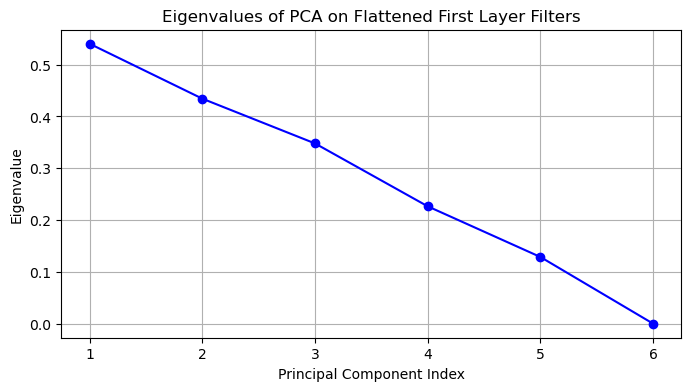

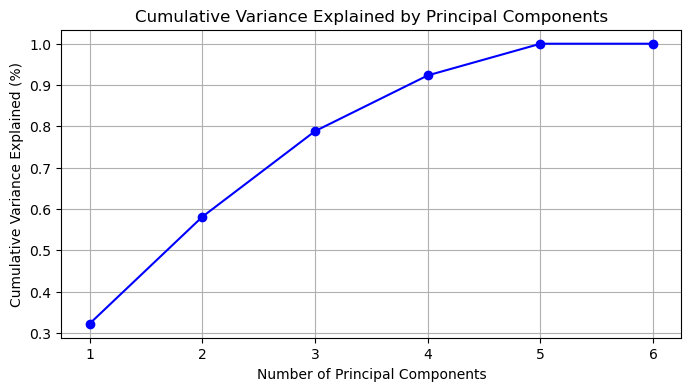

In [2]:
import torch
import numpy as np
from sklearn.decomposition import PCA

# Load the trained model
net_color = SimpleLeNet5Color()
net_color.load_state_dict(torch.load('lenet2_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Flatten the filters
flattened_filters = conv1_weights.view(conv1_weights.size(0), -1).cpu().numpy()

# Perform PCA
pca = PCA()
pca.fit(flattened_filters)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA on Flattened First Layer Filters')
plt.grid(True)
plt.show()


cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative percentage of variance explained
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()



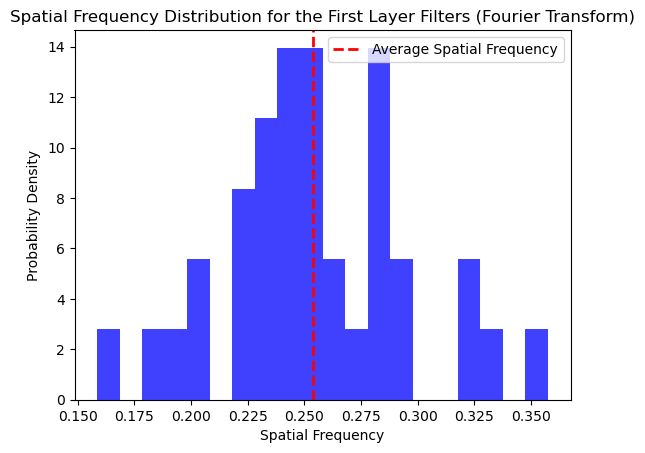

Average Spatial Frequency: 0.25399593855979435


In [3]:
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Assuming SimpleLeNet5Color is already defined somewhere in your code
# class SimpleLeNet5Color:
#     ...

# Create an instance of the model
model = net_color

# Get the first layer filters
filters = model.conv1.weight.data.numpy()

# Compute spatial frequencies using Fourier Transform
spatial_frequencies = []

for i in range(filters.shape[0]):
    for channel in range(3):
        filter_fft = fft2(filters[i, channel, :, :])
        shifted_fft = fftshift(filter_fft)
        
        freq_x = np.fft.fftfreq(filter_fft.shape[1])
        weighted_freq_x = np.abs(freq_x) * np.abs(shifted_fft[0, :])
        spatial_frequencies.append(np.sum(weighted_freq_x) / np.sum(np.abs(shifted_fft[0, :])))

        # Compute spatial frequencies in the y direction
        freq_y = np.fft.fftfreq(filter_fft.shape[0])
        weighted_freq_y = np.abs(freq_y) * np.abs(shifted_fft[:, 0])
        spatial_frequencies.append(np.sum(weighted_freq_y) / np.sum(np.abs(shifted_fft[:, 0])))

# Compute the average spatial frequency
average_spatial_frequency = np.mean(spatial_frequencies)

# Plot the probability distribution
plt.hist(spatial_frequencies, bins=20, density=True, alpha=0.75, color='blue')
plt.axvline(average_spatial_frequency, color='red', linestyle='dashed', linewidth=2, label='Average Spatial Frequency')
plt.xlabel('Spatial Frequency')
plt.ylabel('Probability Density')
plt.title('Spatial Frequency Distribution for the First Layer Filters (Fourier Transform)')
plt.legend()
plt.show()

spatial_frequencies2 = spatial_frequencies


print(f'Average Spatial Frequency: {average_spatial_frequency}')

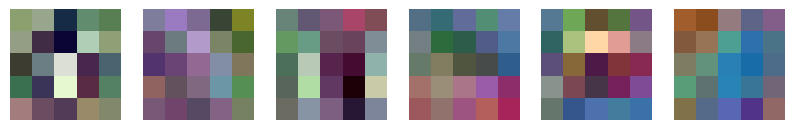

In [4]:
import matplotlib.pyplot as plt
import torch.nn as nn


class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)
        #self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        #x = self.fc2(x)
        #x = self.fc3(x)
        return x

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet3_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

net_color3 = net_color
# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Normalize the weights for better visualization
conv1_weights_normalized = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot the filters in the first layer
plt.figure(figsize=(10, 5))
for i in range(conv1_weights_normalized.size(0)):
    plt.subplot(1, 6, i + 1)
    plt.imshow(conv1_weights_normalized[i, :, :, :].permute(1, 2, 0).numpy())
    #plt.title(f'Filter {i + 1}')
    plt.axis('off')

plt.show()


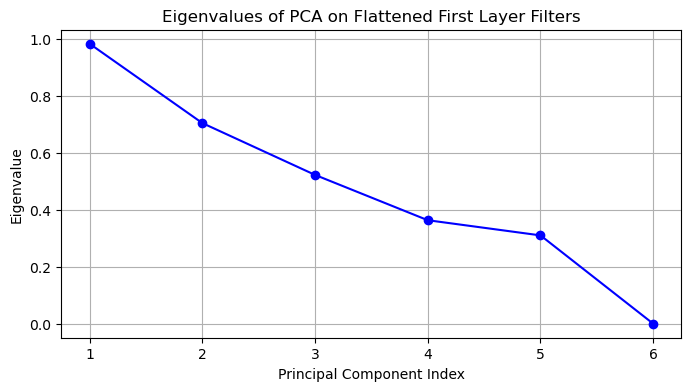

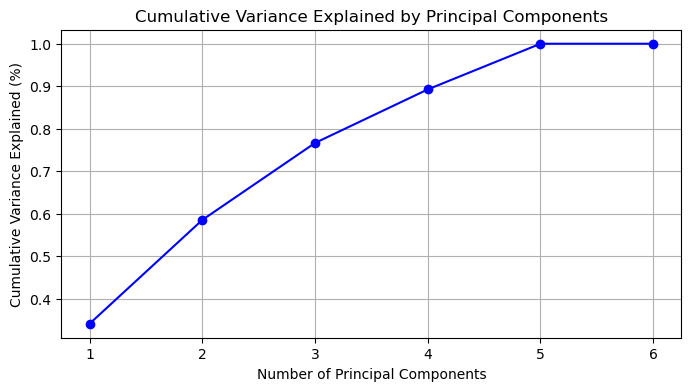

In [5]:
import torch
import numpy as np
from sklearn.decomposition import PCA

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet3_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Flatten the filters
flattened_filters = conv1_weights.view(conv1_weights.size(0), -1).cpu().numpy()

# Perform PCA
pca = PCA()
pca.fit(flattened_filters)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA on Flattened First Layer Filters')
plt.grid(True)
plt.show()

cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative percentage of variance explained
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

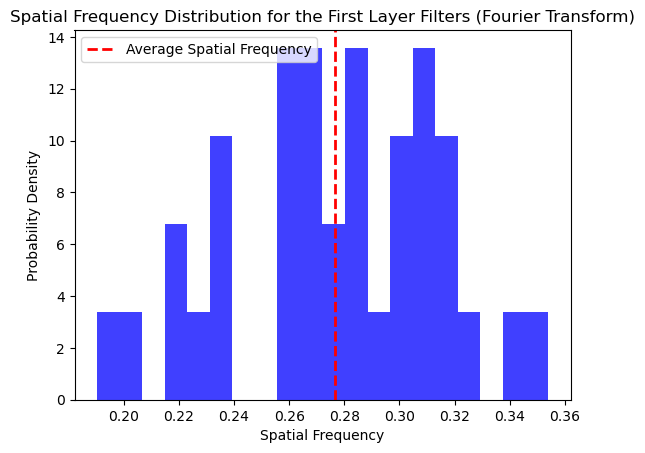

Average Spatial Frequency: 0.2766838259271975


In [6]:
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Assuming SimpleLeNet5Color is already defined somewhere in your code
# class SimpleLeNet5Color:
#     ...

# Create an instance of the model
model = net_color

# Get the first layer filters
filters = model.conv1.weight.data.numpy()

# Compute spatial frequencies using Fourier Transform
spatial_frequencies = []

for i in range(filters.shape[0]):
    for channel in range(3):
        filter_fft = fft2(filters[i, channel, :, :])
        shifted_fft = fftshift(filter_fft)
        
        freq_x = np.fft.fftfreq(filter_fft.shape[1])
        weighted_freq_x = np.abs(freq_x) * np.abs(shifted_fft[0, :])
        spatial_frequencies.append(np.sum(weighted_freq_x) / np.sum(np.abs(shifted_fft[0, :])))

        # Compute spatial frequencies in the y direction
        freq_y = np.fft.fftfreq(filter_fft.shape[0])
        weighted_freq_y = np.abs(freq_y) * np.abs(shifted_fft[:, 0])
        spatial_frequencies.append(np.sum(weighted_freq_y) / np.sum(np.abs(shifted_fft[:, 0])))


# Compute the average spatial frequency
average_spatial_frequency = np.mean(spatial_frequencies)

# Plot the probability distribution
plt.hist(spatial_frequencies, bins=20, density=True, alpha=0.75, color='blue')
plt.axvline(average_spatial_frequency, color='red', linestyle='dashed', linewidth=2, label='Average Spatial Frequency')
plt.xlabel('Spatial Frequency')
plt.ylabel('Probability Density')
plt.title('Spatial Frequency Distribution for the First Layer Filters (Fourier Transform)')
plt.legend()
plt.show()

spatial_frequencies3 = spatial_frequencies

print(f'Average Spatial Frequency: {average_spatial_frequency}')

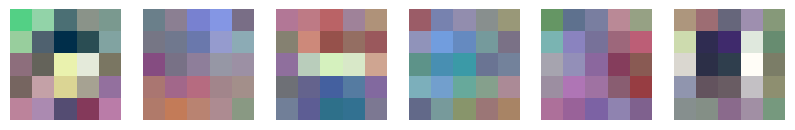

In [7]:
import matplotlib.pyplot as plt
import torch.nn as nn


class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        #x = self.fc3(x)
        return x

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet4_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

net_color4 = net_color

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Normalize the weights for better visualization
conv1_weights_normalized = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot the filters in the first layer
plt.figure(figsize=(10, 5))
for i in range(conv1_weights_normalized.size(0)):
    plt.subplot(1, 6, i + 1)
    plt.imshow(conv1_weights_normalized[i, :, :, :].permute(1, 2, 0).numpy())
    #plt.title(f'Filter {i + 1}')
    plt.axis('off')

plt.show()


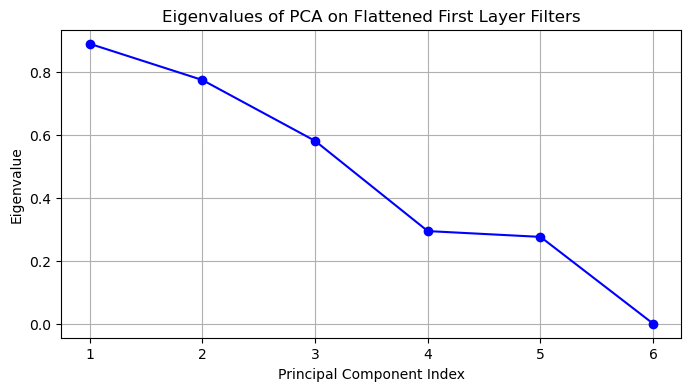

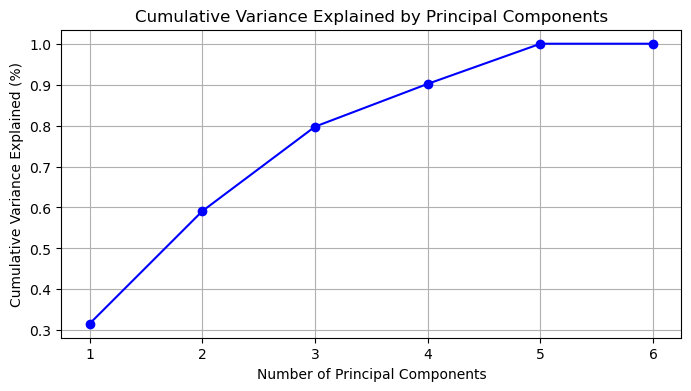

In [8]:
import torch
import numpy as np
from sklearn.decomposition import PCA

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet4_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Flatten the filters
flattened_filters = conv1_weights.view(conv1_weights.size(0), -1).cpu().numpy()

# Perform PCA
pca = PCA()
pca.fit(flattened_filters)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA on Flattened First Layer Filters')
plt.grid(True)
plt.show()

cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative percentage of variance explained
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

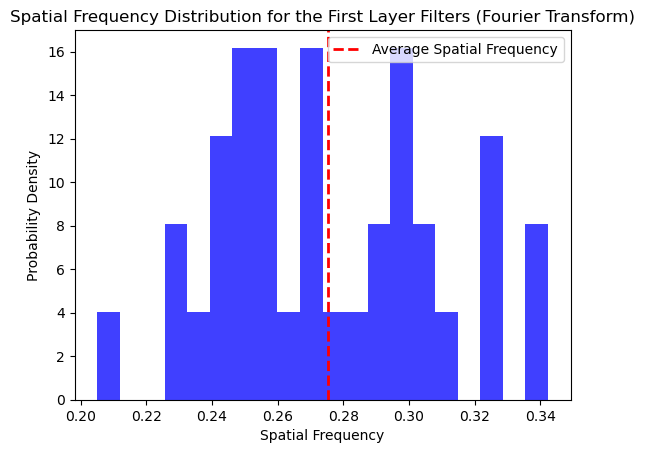

Average Spatial Frequency: 0.2752562945029649


In [9]:
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Assuming SimpleLeNet5Color is already defined somewhere in your code
# class SimpleLeNet5Color:
#     ...

# Create an instance of the model
model = net_color

# Get the first layer filters
filters = model.conv1.weight.data.numpy()

# Compute spatial frequencies using Fourier Transform
spatial_frequencies = []

for i in range(filters.shape[0]):
    for channel in range(3):
        filter_fft = fft2(filters[i, channel, :, :])
        shifted_fft = fftshift(filter_fft)
        
        freq_x = np.fft.fftfreq(filter_fft.shape[1])
        weighted_freq_x = np.abs(freq_x) * np.abs(shifted_fft[0, :])
        spatial_frequencies.append(np.sum(weighted_freq_x) / np.sum(np.abs(shifted_fft[0, :])))

        # Compute spatial frequencies in the y direction
        freq_y = np.fft.fftfreq(filter_fft.shape[0])
        weighted_freq_y = np.abs(freq_y) * np.abs(shifted_fft[:, 0])
        spatial_frequencies.append(np.sum(weighted_freq_y) / np.sum(np.abs(shifted_fft[:, 0])))


# Compute the average spatial frequency
average_spatial_frequency = np.mean(spatial_frequencies)

# Plot the probability distribution
plt.hist(spatial_frequencies, bins=20, density=True, alpha=0.75, color='blue')
plt.axvline(average_spatial_frequency, color='red', linestyle='dashed', linewidth=2, label='Average Spatial Frequency')
plt.xlabel('Spatial Frequency')
plt.ylabel('Probability Density')
plt.title('Spatial Frequency Distribution for the First Layer Filters (Fourier Transform)')
plt.legend()
plt.show()

spatial_frequencies4 = spatial_frequencies

print(f'Average Spatial Frequency: {average_spatial_frequency}')

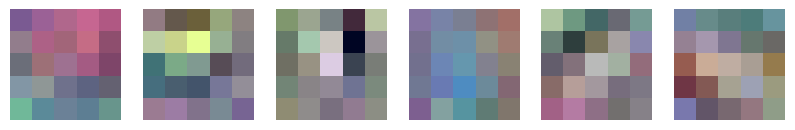

In [10]:
import matplotlib.pyplot as plt
import torch.nn as nn


class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet5_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

net_color5 = net_color

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Normalize the weights for better visualization
conv1_weights_normalized = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot the filters in the first layer
plt.figure(figsize=(10, 5))
for i in range(conv1_weights_normalized.size(0)):
    plt.subplot(1, 6, i + 1)
    plt.imshow(conv1_weights_normalized[i, :, :, :].permute(1, 2, 0).numpy())
    #plt.title(f'Filter {i + 1}')
    plt.axis('off')

plt.show()


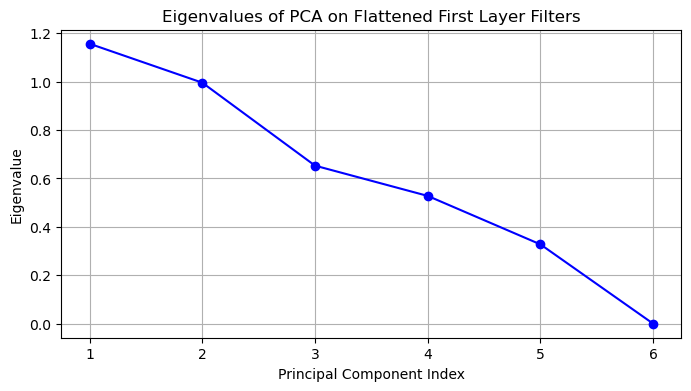

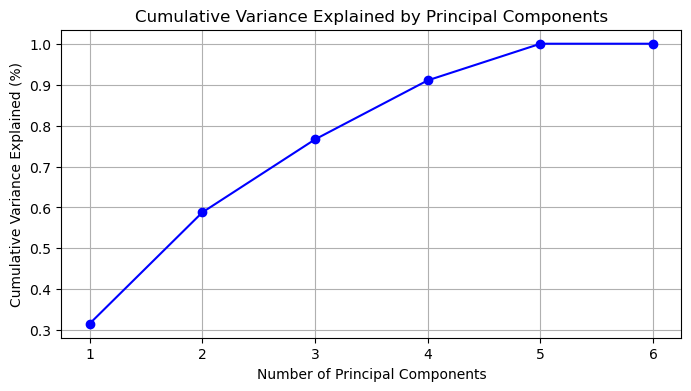

In [11]:
import torch
import numpy as np
from sklearn.decomposition import PCA

# Load the trained model
net_color = LeNet5Color()
net_color.load_state_dict(torch.load('lenet5_color_model.pth'))
net_color.eval()  # Set the model to evaluation mode

# Get the weights of the first convolutional layer
conv1_weights = net_color.conv1.weight.data

# Flatten the filters
flattened_filters = conv1_weights.view(conv1_weights.size(0), -1).cpu().numpy()

# Perform PCA
pca = PCA()
pca.fit(flattened_filters)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA on Flattened First Layer Filters')
plt.grid(True)
plt.show()

cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative percentage of variance explained
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

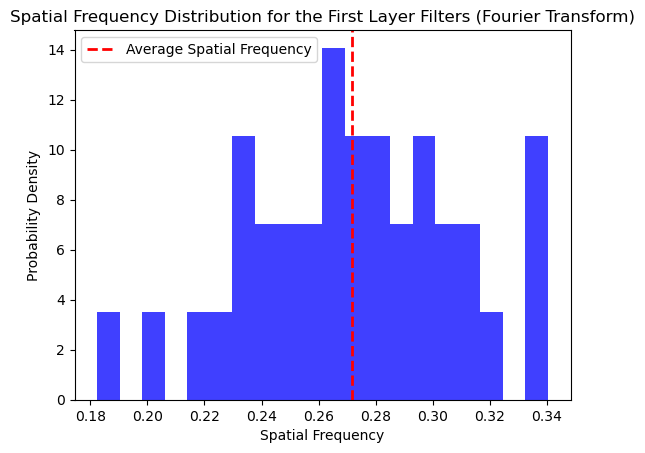

Average Spatial Frequency: 0.271739231532849


In [12]:
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Assuming SimpleLeNet5Color is already defined somewhere in your code
# class SimpleLeNet5Color:
#     ...

# Create an instance of the model
model = net_color

# Get the first layer filters
filters = model.conv1.weight.data.numpy()

# Compute spatial frequencies using Fourier Transform
spatial_frequencies = []

for i in range(filters.shape[0]):
    for channel in range(3):
        filter_fft = fft2(filters[i, channel, :, :])
        shifted_fft = fftshift(filter_fft)
        
        freq_x = np.fft.fftfreq(filter_fft.shape[1])
        weighted_freq_x = np.abs(freq_x) * np.abs(shifted_fft[0, :])
        spatial_frequencies.append(np.sum(weighted_freq_x) / np.sum(np.abs(shifted_fft[0, :])))

        # Compute spatial frequencies in the y direction
        freq_y = np.fft.fftfreq(filter_fft.shape[0])
        weighted_freq_y = np.abs(freq_y) * np.abs(shifted_fft[:, 0])
        spatial_frequencies.append(np.sum(weighted_freq_y) / np.sum(np.abs(shifted_fft[:, 0])))


# Compute the average spatial frequency
average_spatial_frequency = np.mean(spatial_frequencies)

# Plot the probability distribution
plt.hist(spatial_frequencies, bins=20, density=True, alpha=0.75, color='blue')
plt.axvline(average_spatial_frequency, color='red', linestyle='dashed', linewidth=2, label='Average Spatial Frequency')
plt.xlabel('Spatial Frequency')
plt.ylabel('Probability Density')
plt.title('Spatial Frequency Distribution for the First Layer Filters (Fourier Transform)')
plt.legend()
plt.show()

spatial_frequencies5 = spatial_frequencies


print(f'Average Spatial Frequency: {average_spatial_frequency}')

In [13]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate



def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

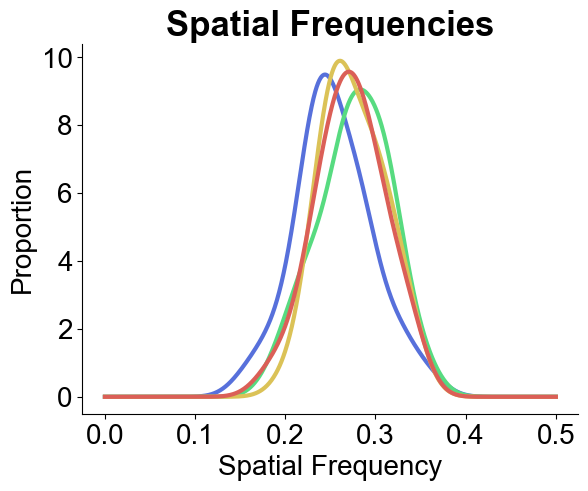

In [14]:
import seaborn as sns
rainbow = sns.color_palette("hls", 8)
 
x_grid = np.linspace(0, .5, 1000)
bandwidth = .02


fig, ax = plt.subplots() 

plt.plot(x_grid, kde_sklearn(np.array(spatial_frequencies2), x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, color = rainbow[5])


plt.plot(x_grid, kde_sklearn(np.array(spatial_frequencies3), x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, color = rainbow[3])

plt.plot(x_grid, kde_sklearn(np.array(spatial_frequencies4), x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, color = rainbow[1])

plt.plot(x_grid, kde_sklearn(np.array(spatial_frequencies5), x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, color = rainbow[0])


ax.set_xlabel('Spatial Frequency', fontname="Arial", fontsize = 20)
ax.set_ylabel('Proportion', fontname="Arial", fontsize = 20)
ax.set_title('Spatial Frequencies', fontname="Arial", fontsize = 25, fontweight="bold")



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
    
    
    
plt.show()

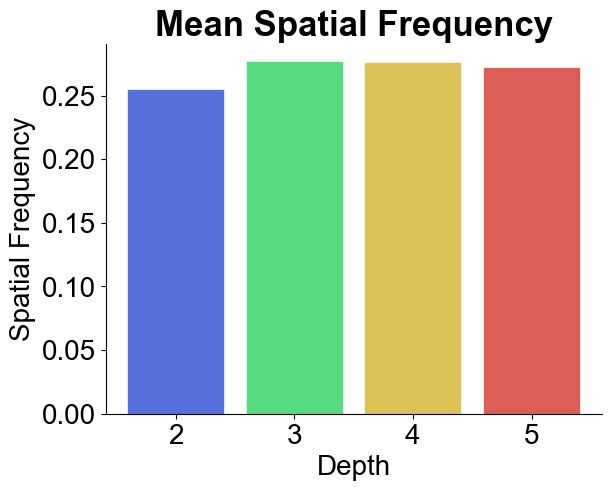

In [15]:
from scipy.stats import kurtosis
def calculate_histogram_kurtosis(layer):
    hist, bin_edges = np.histogram(layer.flatten(), bins=50)
    return kurtosis(hist)

rainbow = sns.color_palette("hls", 8)

# Arrays to analyze

# Calculate kurtosis for each layer
kurtosis_values = [np.mean(spatial_frequencies2), np.mean(spatial_frequencies3), np.mean(spatial_frequencies4), np.mean(spatial_frequencies5)] 

fig, ax = plt.subplots() 

# Bar plot

ax.set_xlabel('Depth', fontname="Arial", fontsize = 20)
ax.set_ylabel('Spatial Frequency', fontname="Arial", fontsize = 20)
ax.set_title('Mean Spatial Frequency', fontname="Arial", fontsize = 25, fontweight="bold")


colors = [5, 3, 1, 0];
layers = ['2', '3', '4', '5']

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
bars = ax.bar(layers, kurtosis_values, color='blue')
for i, bar in enumerate(bars):
    bar.set_color(rainbow[colors[i]])


# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
    
plt.show()

In [16]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
data_loader = DataLoader(cifar_dataset, batch_size=1, shuffle=True)

model = net_color2

# Get a random image from the dataset
random_image, _ = next(iter(data_loader))

# Function to extract feature maps from the first layer
def get_first_layer_output(model, input_image):
    return model.conv1(input_image)

# Get feature maps for the first layer
with torch.no_grad():
    feature_maps = get_first_layer_output(model, random_image)

# Visualize feature maps in a single row
num_feature_maps = feature_maps.size(1)
plt.figure(figsize=(15, 2))

for i in range(num_feature_maps):
    plt.subplot(1, num_feature_maps, i + 1)
    plt.imshow(feature_maps[0, i].numpy(), cmap='gray')
    plt.axis('off')

plt.show()


NameError: name 'transforms' is not defined

In [ ]:
model = net_color3

# Get feature maps for the first layer
with torch.no_grad():
    feature_maps = get_first_layer_output(model, random_image)

# Visualize feature maps in a single row
num_feature_maps = feature_maps.size(1)
plt.figure(figsize=(15, 2))

for i in range(num_feature_maps):
    plt.subplot(1, num_feature_maps, i + 1)
    plt.imshow(feature_maps[0, i].numpy(), cmap='gray')
    plt.axis('off')

plt.show()



In [ ]:
model = net_color4

# Get feature maps for the first layer
with torch.no_grad():
    feature_maps = get_first_layer_output(model, random_image)

# Visualize feature maps in a single row
num_feature_maps = feature_maps.size(1)
plt.figure(figsize=(15, 2))

for i in range(num_feature_maps):
    plt.subplot(1, num_feature_maps, i + 1)
    plt.imshow(feature_maps[0, i].numpy(), cmap='gray')
    plt.axis('off')

plt.show()



In [ ]:
model = net_color5

# Get feature maps for the first layer
with torch.no_grad():
    feature_maps = get_first_layer_output(model, random_image)

# Visualize feature maps in a single row
num_feature_maps = feature_maps.size(1)
plt.figure(figsize=(15, 2))

for i in range(num_feature_maps):
    plt.subplot(1, num_feature_maps, i + 1)
    plt.imshow(feature_maps[0, i].numpy(), cmap='gray')
    plt.axis('off')

plt.show()

